In [1]:
import math
import pandas as pd
import random
import seaborn as sns
import statistics as stats
import warnings

In [2]:
## Uncomment and run this cell to reset the state and get reproducible results
# random.seed(a="seed dated: 2020-07-23")

In [3]:
# Code for configuration of global parameters
# pd.options.display.max_columns = None
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# The number of trials for each value of k
trials = 250

In [5]:
def min_max(a, b, c):
    """
    Returns the maximum possible and the minimum possible root from
    the given parameters. It returns None if no real roots exist.
    """
    # We must have a quadratic equation
    if a == 0:
        return None
    
    dsquared = b * b - 4 * a * c
    
    # We only consider real roots
    if dsquared < 0:
        return None
    
    d = math.sqrt(dsquared)
    twoa = 2 * a
    minroot = (-b - d) / twoa
    maxroot = (-b + d) / twoa
    return (minroot, maxroot)

In [6]:
def get_random_value(a):
    """
    Returns a continuous uniformly distributed real in the range [0, a)
    """
    return random.uniform(0, a)

In [7]:
def get_row_of_data_for(theta):
    """
    Returns a row of data by performing an experiment for the given
    value of theta. The values returned are:
    1. theta
    2. Mean of the maximum roots
    3. Mean of the minimum roots
    4. Std dev of the maximum roots
    5. Std dev of the minimum roots
    """
    max_roots = []
    min_roots = []

    for current_trial in range(trials):
        # We loop until we get valid roots
        roots = None
        while roots is None:
            a = get_random_value(theta)
            b = get_random_value(theta)
            c = get_random_value(theta)

            roots = min_max(a, b, c)

        # unpack the data
        minroot, maxroot = roots
        max_roots.append(maxroot)
        min_roots.append(minroot)
    
    return [
        theta,
        stats.mean(max_roots), stats.mean(min_roots),
        stats.stdev(max_roots), stats.stdev(min_roots)
    ]

In [28]:
data = [get_row_of_data_for(theta) for theta in range(100, 2001, 100)]

In [29]:
df = pd.DataFrame(
    data, columns=[
        "Theta",
        "Mean of the maximum roots",
        "Mean of the minimum roots",
        "Std dev of the maximum roots",
        "Std dev of the minimum roots"
    ]
)
df

,Theta,Mean of the maximum roots,Mean of the minimum roots,Std dev of the maximum roots,Std dev of the minimum roots
0,100,-0.607296,-22.280716,0.578726,124.788237
1,200,-0.553903,-24.721649,0.537107,211.099556
2,300,-0.542707,-9.863309,0.590656,24.716974
3,400,-0.546407,-11.552074,0.601324,50.587434
4,500,-0.543700,-26.689664,0.624781,158.854917
5,600,-0.551984,-7.650567,0.581765,32.178904
6,700,-0.577472,-7.960499,0.520409,17.319140
7,800,-0.561054,-11.784779,0.594430,60.016710
8,900,-0.543727,-16.256058,0.551379,102.224049
9,1000,-0.559803,-10.578346,0.528757,37.336627


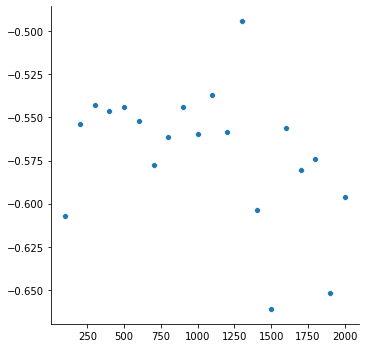

In [30]:
try:
    sns.relplot(x=df["Theta"],y=df["Mean of the maximum roots"],data=df)
except:
    pass

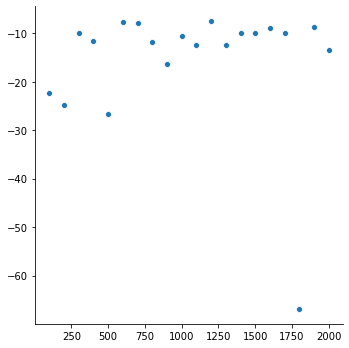

In [31]:
try:
    sns.relplot(x=df["Theta"],y=df["Mean of the minimum roots"],data=df)
except:
    pass

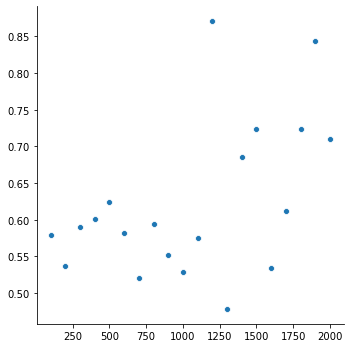

In [32]:
try:
    sns.relplot(x=df["Theta"],y=df["Std dev of the maximum roots"],data=df)
except:
    pass

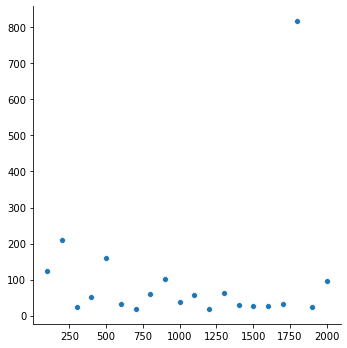

In [33]:
try:
    sns.relplot(x=df["Theta"],y=df["Std dev of the minimum roots"],data=df)
except:
    pass